# **Consolidated Code**
## RanFor, kNN, SVM
### *With & Without PCA*

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
from skimage.transform import resize 
from skimage.io import imread 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from skimage.feature import hog
from skimage import exposure

## Data Loading

In [3]:
# Define categories
Categories = ['fracture', 'not fracture']

# Initialize input and output arrays
features_arr = []  # Input array
target_arr = []  # Output array

# Define directory containing image categories
datadir = 'IMAGES/train'

# Iterate through each category
for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(datadir, category)
    
    # Iterate through images in the category directory
    for img_name in os.listdir(path):
        if "rotated" not in img_name:
            # Read and resize the image
            print(img_name)
            img_array = imread(os.path.join(path, img_name))
            img_resized = resize(img_array, (150, 150))
            
            # Extract HOG features from the resized image
            hog_features, hog_image = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                          visualize=True)
            
            # Rescale the intensity of the HOG image
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 5))
            
            # Append the features to the input array
            features_arr.append(hog_features)
            
            # Append the label to the output array
            target_arr.append(Categories.index(category))
            
    
    print(f'Loaded category: {category} successfully')

Loading category: fracture


FileNotFoundError: [Errno 2] No such file or directory: 'IMAGES/train/fracture'

In [3]:
df=pd.DataFrame(features_arr)  
target=np.array(target_arr)
df['Target']=target 

In [4]:
df.shape

(177, 10405)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10395,10396,10397,10398,10399,10400,10401,10402,10403,Target
0,1.594740e-01,0.000000,0.021297,0.000000,5.893342e-03,0.010446,0.046342,0.363682,0.363682,1.687992e-01,...,3.778532e-01,0.000000,0.000105,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.377853,0
1,6.167181e-01,0.002274,0.000000,0.000300,5.573299e-04,0.000000,0.000000,0.000000,0.007228,3.712822e-01,...,2.105640e-01,0.225241,0.192514,0.204402,4.206275e-02,2.252410e-01,0.147690,0.225241,0.130354,0
2,3.006020e-01,0.105601,0.055550,0.000000,3.078601e-02,0.000000,0.000000,0.090055,0.300602,3.006020e-01,...,1.911554e-01,0.094471,0.069004,0.064883,9.483255e-02,1.412949e-01,0.166847,0.202707,0.197932,0
3,1.301043e-08,0.000000,0.000000,0.000000,1.517883e-08,0.000000,0.000000,0.000000,0.000000,1.409463e-08,...,5.711785e-16,0.000000,0.000000,0.000000,5.303801e-16,9.122815e-17,0.000000,0.000000,0.000000,0
4,1.265167e-01,0.002938,0.150460,0.101844,2.909516e-01,0.034786,0.000000,0.000278,0.015615,1.039487e-03,...,2.710205e-01,0.271020,0.271020,0.180244,6.241828e-02,5.240425e-02,0.065449,0.000000,0.040611,0


In [6]:
x=df.iloc[:,:-1]  #input data  
y=df.iloc[:,-1] #output data 

## 1. Random Forest without PCA

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [8]:
clf = RandomForestClassifier(n_estimators= 3, criterion="entropy")  
model = clf.fit(x, y)

In [9]:
model

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [10]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [11]:
print(classification_report(y_test, y_pred, target_names=Categories))

               precision    recall  f1-score   support

    fractured       0.95      0.91      0.93        23
not fractured       0.86      0.92      0.89        13

     accuracy                           0.92        36
    macro avg       0.91      0.92      0.91        36
 weighted avg       0.92      0.92      0.92        36



In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


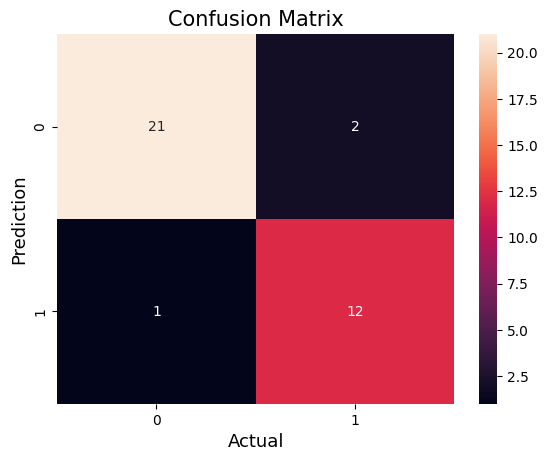

In [13]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 2. Random Forest with PCA

In [14]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100) # adjust the number of components as needed
x_pca = pca.fit_transform(scaled_data)

# Concatenate PCA features with target
df_pca = pd.DataFrame(x_pca)
df_pca['Target'] = df['Target']

In [15]:
x=df_pca.iloc[:,:-1]  #input data  
y=df_pca.iloc[:,-1] #output data 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [17]:
clf = RandomForestClassifier(n_estimators= 3, criterion="entropy")  
modelpca = clf.fit(x, y)

In [18]:
modelpca

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [19]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [20]:
print(classification_report(y_test, y_pred, target_names=Categories))

               precision    recall  f1-score   support

    fractured       0.90      0.83      0.86        23
not fractured       0.73      0.85      0.79        13

     accuracy                           0.83        36
    macro avg       0.82      0.84      0.82        36
 weighted avg       0.84      0.83      0.84        36



In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


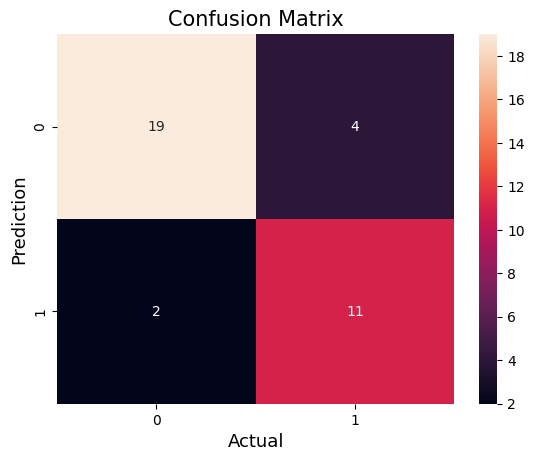

In [22]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 3. kNN without PCA

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [24]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn_classifier.predict(x_test_scaled)

print("Predicted Results:")
y_pred

Predicted Results:


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [27]:
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 61.111111111111114% accurate


In [28]:
print(classification_report(y_test, y_pred, target_names=Categories))

               precision    recall  f1-score   support

    fractured       0.65      0.87      0.74        23
not fractured       0.40      0.15      0.22        13

     accuracy                           0.61        36
    macro avg       0.52      0.51      0.48        36
 weighted avg       0.56      0.61      0.55        36



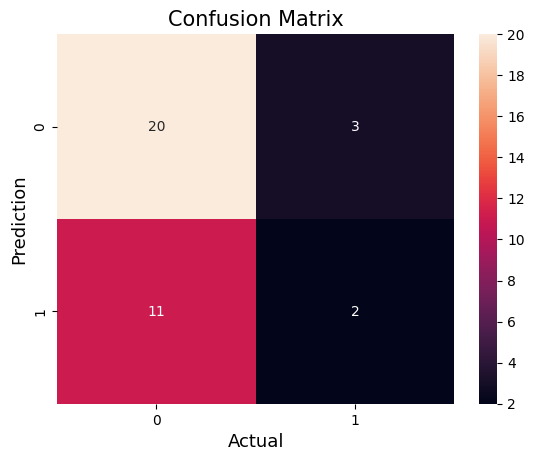

In [29]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 4. kNN with PCA

In [30]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100) # adjust the number of components as needed
x_pca = pca.fit_transform(scaled_data)

# Concatenate PCA features with target
df_pca = pd.DataFrame(x_pca)
df_pca['Target'] = df['Target']

In [31]:
x=df_pca.iloc[:,:-1]  #input data  
y=df_pca.iloc[:,-1] #output data 

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [33]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn_classifier.predict(x_test_scaled)

print("Predicted Results:")
y_pred

Predicted Results:


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [35]:
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 61.111111111111114% accurate


In [36]:
print(classification_report(y_test, y_pred, target_names=Categories))

               precision    recall  f1-score   support

    fractured       0.65      0.87      0.74        23
not fractured       0.40      0.15      0.22        13

     accuracy                           0.61        36
    macro avg       0.52      0.51      0.48        36
 weighted avg       0.56      0.61      0.55        36



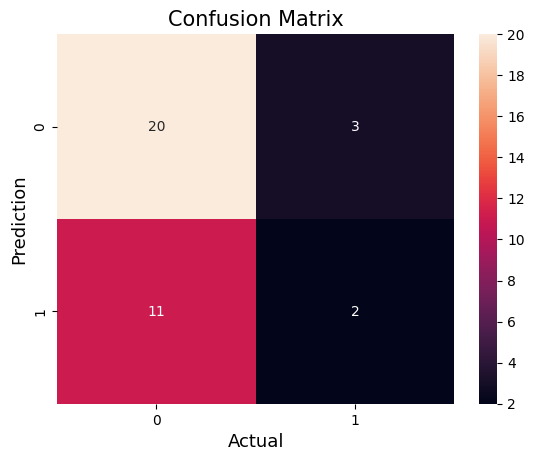

In [37]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 5. SVM without PCA

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['linear','rbf','poly']} 

In [39]:
# Creating a support vector classifier 
svc=svm.SVC(probability=True)

In [40]:
# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

SVC(kernel='linear')

In [ ]:
# Fit the model
model.fit(x_train, y_train)

In [41]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Categories))

Accuracy: 0.6388888888888888
               precision    recall  f1-score   support

    fractured       0.76      0.59      0.67        22
not fractured       0.53      0.71      0.61        14

     accuracy                           0.64        36
    macro avg       0.65      0.65      0.64        36
 weighted avg       0.67      0.64      0.64        36



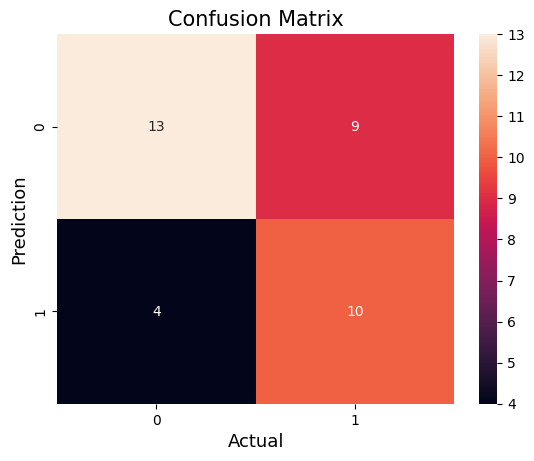

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 6. SVM with PCA

In [44]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100) # adjust the number of components as needed
x_pca = pca.fit_transform(scaled_data)

# Concatenate PCA features with target
df_pca = pd.DataFrame(x_pca)
df_pca['Target'] = df['Target']

In [45]:
x=df_pca.iloc[:,:-1]  #input data  
y=df_pca.iloc[:,-1] #output data 

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, 
                                               random_state=77, 
                                               stratify=y) 

In [47]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['linear','rbf','poly']} 

In [48]:
# Creating a support vector classifier 
svc=svm.SVC(probability=True) 

SVC(kernel='linear')

In [ ]:
# Creating a model using GridSearchCV with the parameters grid 
model=GridSearchCV(svc,param_grid)

In [ ]:
# Fit the model
model.fit(x_train, y_train)

In [49]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [50]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=Categories))

Accuracy: 0.5
               precision    recall  f1-score   support

    fractured       0.62      0.57      0.59        23
not fractured       0.33      0.38      0.36        13

     accuracy                           0.50        36
    macro avg       0.48      0.47      0.47        36
 weighted avg       0.52      0.50      0.51        36



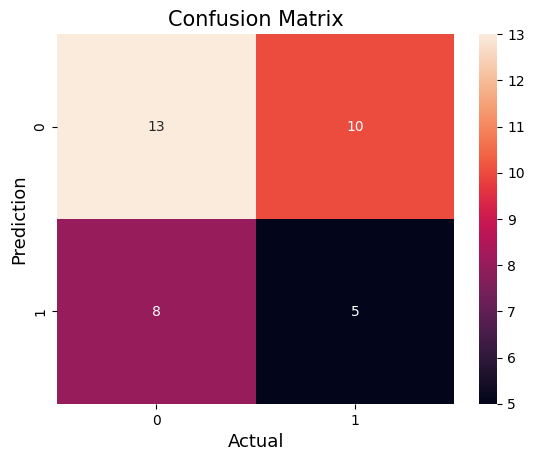

In [51]:
conf_mat = confusion_matrix(y_test,y_pred)

sns.heatmap(conf_mat,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()